<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_724/3754641982.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')


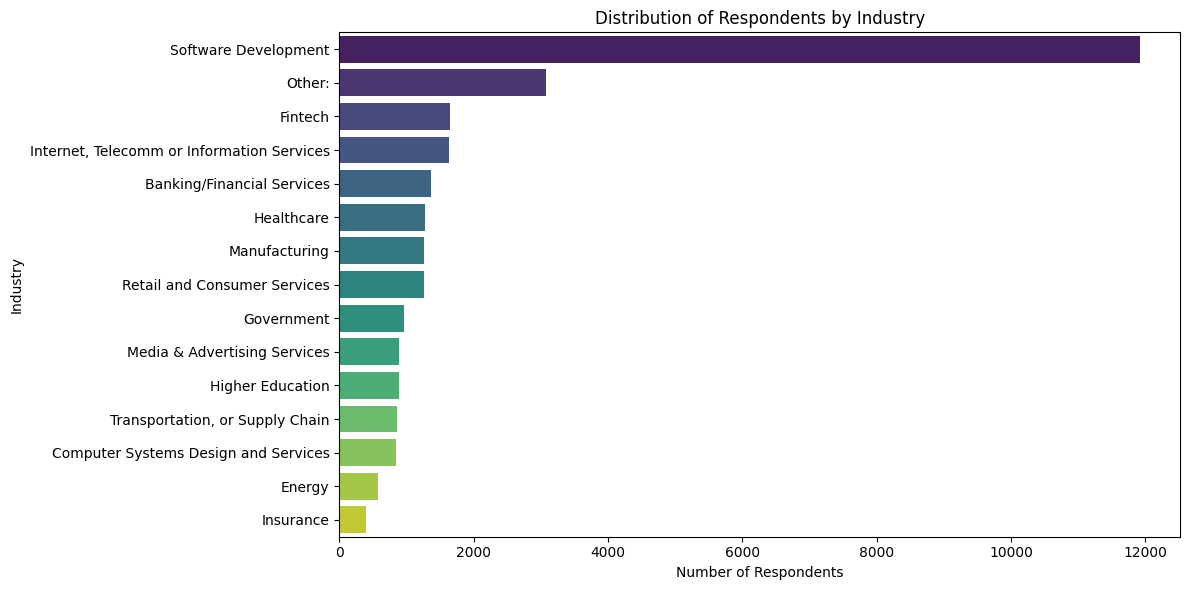

In [3]:
##Write your code here

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop missing industry values
df_industry = df.dropna(subset=['Industry'])

# Step 2: Count and sort industries
industry_counts = df_industry['Industry'].value_counts().sort_values(ascending=False)

# Step 3: Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='viridis')

plt.title('Distribution of Respondents by Industry')
plt.xlabel('Number of Respondents')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
##Write your code hereimport pandas as pd

# Step 1: Drop missing compensation values
df_comp = df.dropna(subset=['ConvertedCompYearly'])

# Step 2: Calculate statistics
mean_comp = df_comp['ConvertedCompYearly'].mean()
median_comp = df_comp['ConvertedCompYearly'].median()
std_comp = df_comp['ConvertedCompYearly'].std()

print(f" Mean Compensation: {mean_comp:,.2f}")
print(f"Median Compensation: {median_comp:,.2f}")
print(f" Standard Deviation: {std_comp:,.2f}")

# Step 3: Define outlier threshold (e.g., mean + 3 * std)
threshold = mean_comp + 3 * std_comp
print(f"\n Outlier Threshold: {threshold:,.2f}")

# Step 4: Identify outliers
outliers = df_comp[df_comp['ConvertedCompYearly'] > threshold]
print(f" Number of High Compensation Outliers: {len(outliers)}")

# Optional: Display the top 5 outlier rows
print("\nTop 5 Outliers:")
print(outliers[['ConvertedCompYearly', 'Employment', 'JobSat', 'Country']].head())



 Mean Compensation: 86,155.29
Median Compensation: 65,000.00
 Standard Deviation: 186,756.97

 Outlier Threshold: 646,426.21
 Number of High Compensation Outliers: 89

Top 5 Outliers:
      ConvertedCompYearly           Employment  JobSat  \
529              650000.0  Employed, full-time     6.0   
828             1000000.0  Employed, full-time     8.0   
1932             945000.0  Employed, full-time     2.0   
2171             750000.0  Employed, full-time     8.0   
2187            2000000.0  Employed, full-time     NaN   

                       Country  
529   United States of America  
828   United States of America  
1932  United States of America  
2171  United States of America  
2187                     Gabon  


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th percentile): 32,712.00
Q3 (75th percentile): 107,971.50
IQR (Q3 - Q1): 75,259.50

Lower Bound: -80,177.25
Upper Bound: 220,860.75

 Number of IQR Outliers: 978


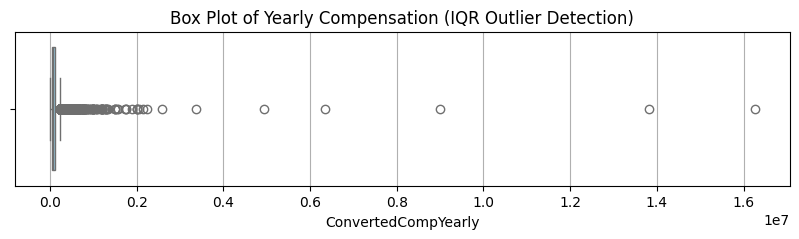

In [6]:
##Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop missing values
df_iqr = df.dropna(subset=['ConvertedCompYearly'])

# Step 2: Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = df_iqr['ConvertedCompYearly'].quantile(0.25)
Q3 = df_iqr['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25th percentile): {Q1:,.2f}")
print(f"Q3 (75th percentile): {Q3:,.2f}")
print(f"IQR (Q3 - Q1): {IQR:,.2f}")

# Step 3: Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"\nLower Bound: {lower_bound:,.2f}")
print(f"Upper Bound: {upper_bound:,.2f}")

# Step 4: Identify outliers
outliers_iqr = df_iqr[(df_iqr['ConvertedCompYearly'] < lower_bound) | 
                      (df_iqr['ConvertedCompYearly'] > upper_bound)]
print(f"\n Number of IQR Outliers: {len(outliers_iqr)}")

# Step 5: Visualize with a box plot
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_iqr['ConvertedCompYearly'], color='skyblue')
plt.title('Box Plot of Yearly Compensation (IQR Outlier Detection)')
plt.xlabel('ConvertedCompYearly')
plt.grid(axis='x')
plt.show()



<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [7]:
##Write your code here
# Step 1: Drop missing compensation values
df_clean = df.dropna(subset=['ConvertedCompYearly'])

# Step 2: Calculate IQR for ConvertedCompYearly
Q1 = df_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = df_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out outliers
df_no_outliers = df_clean[(df_clean['ConvertedCompYearly'] >= lower_bound) & 
                          (df_clean['ConvertedCompYearly'] <= upper_bound)]

# Step 5: Validate size before and after
print(f"Original DataFrame size (with comp): {df_clean.shape}")
print(f"New DataFrame size (no outliers): {df_no_outliers.shape}")


Original DataFrame size (with comp): (23435, 114)
New DataFrame size (no outliers): (22457, 114)


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


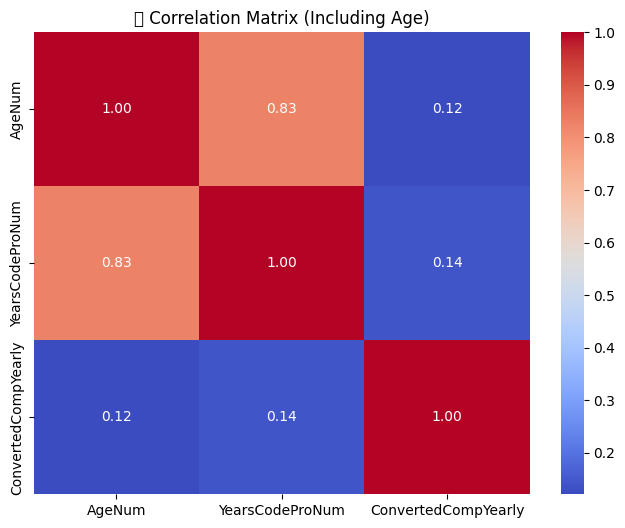

In [8]:
##Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Map Age ranges to approximate numeric values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 67,
    'Prefer not to say': None
}

# Create a numeric age column
df['AgeNum'] = df['Age'].map(age_mapping)

# Step 2: Convert YearsCodePro to numeric (if needed)
def convert_years(val):
    if val == 'Less than 1 year':
        return 0.5
    elif val == 'More than 50 years':
        return 51
    try:
        return float(val)
    except:
        return None

df['YearsCodeProNum'] = df['YearsCodePro'].apply(convert_years)

# Step 3: Select relevant numeric columns for correlation
num_cols = ['AgeNum', 'YearsCodeProNum', 'ConvertedCompYearly']
df_corr = df[num_cols].dropna()

# Step 4: Compute correlation matrix
corr_matrix = df_corr.corr(method='pearson')

# Step 5: Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔍 Correlation Matrix (Including Age)")
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
